In [1]:
#All code present was constructed by and is the explicit property of Kerry Hall. 
#Problems and datasets sourced from "Probability and Statistics for Engineers and Scientists" by Walpole, Myers, Myers, and Ye, 9th ed.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom, hypergeom
from numpy import exp
from math import factorial

Problem set: 5.6, 5.16, 5.26, 5.36, 5.58, 5.63

5.6: According to a survey by the Administration Management Society, one-half of U.S. companies give employees 4 weeks of vacation after they have been with the company for 15 years. Find the proability that among 6 companies surveyed at random, the number that give employees 4 weeks of vacation after 15 years of employment is (a) anywhere from 2 to 5, (b) fewer than 3.


The likelihood that the number is greater than or equal to 2 and less than or equal to 5 is: 87.5%.


The likelihood that the number is less than 3 is: 34.4%.



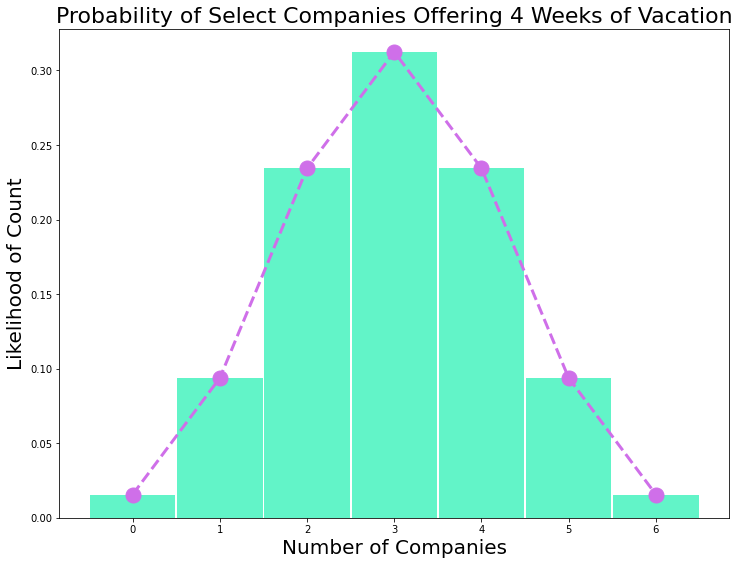

In [2]:
n = 6
r_list_56 = list(range(n+1))
p = 0.5
#binom.pmf is the binomial mass function evaluated at given r, n, and p. 
dist = [binom.pmf(r, n, p) for r in r_list_56] # making a list of all discrete pmf outcomes by iterating over r values

print("\nThe likelihood that the number is greater than or equal to 2 and less than or equal to 5 is:", str(np.round(100*sum(dist[2:6]), 1)) + "%.\n") # performing calculation by slicing dist list
print("\nThe likelihood that the number is less than 3 is:", str(np.round(100*sum(dist[0:3]), 1)) + "%.\n") # performing calculation by slicing dist list

fig, ax = plt.subplots(figsize=(12,9))
ax.bar(r_list_56, dist, color="#62f4c8", width=0.98)
ax.plot(r_list_56, dist, color='#cf6fe9', marker='o', linestyle='dashed', linewidth=3, markersize=15)
plt.title("Probability of Select Companies Offering 4 Weeks of Vacation", fontsize=22)
ax.set_ylabel("Likelihood of Count", fontsize=20)
ax.set_xlabel("Number of Companies", fontsize=20)
plt.show()

5.16: Suppose that airplane engines operate independently and fail with probability equal to 0.4. Assuming that a plane makes a safe flight if at least one-half of its engines run, determine whether a 4-engine plane or a 2-engine plane has the higher probability for a successful flight.

In [3]:
p = 0.6
n_2 = 2
n_4 = 4
r_list_516 = list(range(1+n_4))
dist_2_eng = [binom.pmf(r, n_2, p) for r in r_list_516[0:3]] # making a list of all discrete pmf outcomes by iterating over r values 0 to 2
dist_4_eng = [binom.pmf(r, n_4, p) for r in r_list_516] # making a list of all discrete pmf outcomes by iterating over r values 0 to 4
print("\n", int(100*(1-dist_2_eng[0])), "% > ", int(100*(1-sum(dist_4_eng[0:2]))), 
      "%, therefore the likelihood that a 2 engine plane will experience a successful flight is around 2% higher than that of a 4 engine plane.\n", sep="")


84% > 82%, therefore the likelihood that a 2 engine plane will experience a successful flight is around 2% higher than that of a 4 engine plane.



5.26: Assuming that 6 in 10 automobile accidents are due mainly to a speed violation, find the proabability that among 8 automobile accidents, 6 will be due mainly to a speed violation (a) by using the formula for the binomial distribution, (b) by using Table A.1 

In [4]:
p = 0.6
n = 8
r_list_526 = list(range(1+n))
dist_526 = [binom.pmf(r, n, p) for r in r_list_526]
print("The calculated probability that 75% of the 8 accidents were caused by speeding is:", str(np.round(100*dist_526[6], 2)) + "%.\n")
tableA1_initial_value = 0.6846
tableA2_final_value = 0.8936
print("\nThe table probability that 75% of the 8 accidents were caused by speeding is:", str(np.round(100*(tableA2_final_value - tableA1_initial_value), 1)) + "%.\n")

The calculated probability that 75% of the 8 accidents were caused by speeding is: 20.9%.


The table probability that 75% of the 8 accidents were caused by speeding is: 20.9%.



5.36: A manufacturing company uses an acceptance scheme on items from a production line before they are shipped. The plan is a two-stage one. Boxes of 25 items are readied for shipment, and a sample of three items is tested for defectives. If any defectives are found, the entire box is sent back for 100\% screening. If no defectives are found, the box is shipped. (a) what is the probability that a box containing 3 defectives will be shipped (b) what is the probability that a box containing only 1 defective will be sent back for screening?

In [5]:
N = 25
k0 = 3
k1 = 1
n = 3
p_0 = hypergeom.pmf(0, N, n, k0)
p_1 = hypergeom.pmf(1, N, n, k1)
print("The probability that a box containing 3 defectives will escape is: " + str(np.round(100*p_0, 2)) + "%.\n")
print("The probability that a box containing 1 defective will be returned for screening is: " + str(int(100*p_1)) + "%.")

The probability that a box containing 3 defectives will escape is: 66.96%.

The probability that a box containing 1 defective will be returned for screening is: 12%.


5.58: A certain area of the eastern United States is, on average, hit by 6 hurricanes a year. Find the probability that in a given year that area will be hit by (a) fewer than 4 hurricanes (b) anywhere from 6 to 8 hurricanes.

Assume a Poisson distribution.

In [6]:
def poisson_calc(mu, range_, output=0):
    for each in list(range_):
         output += mu**each*exp(-mu)/factorial(each)
    return output

mu_558 = 6
print("The probability that fewer than 4 hurricanes will occur is:", str(np.round(100*poisson_calc(mu_558, range(0,4)), 2)) + "%.\n")
print("The probability that 6-8 hurricanes will occur is:",str(np.round(100*poisson_calc(mu_558, range(6,9)), 2)) + "%.\n")

The probability that fewer than 4 hurricanes will occur is: 15.12%.

The probability that 6-8 hurricanes will occur is: 40.16%.



5.63: Find the mean and variance of the random variable X in Exercise 5.58, representing the number of hurricanes per year to hit a certain area of the eastern United States.

The calculated mean number of hurricanes per year is: 6. This is the expected value as the Poisson distribution was generated around this average.

The variance is: 6.



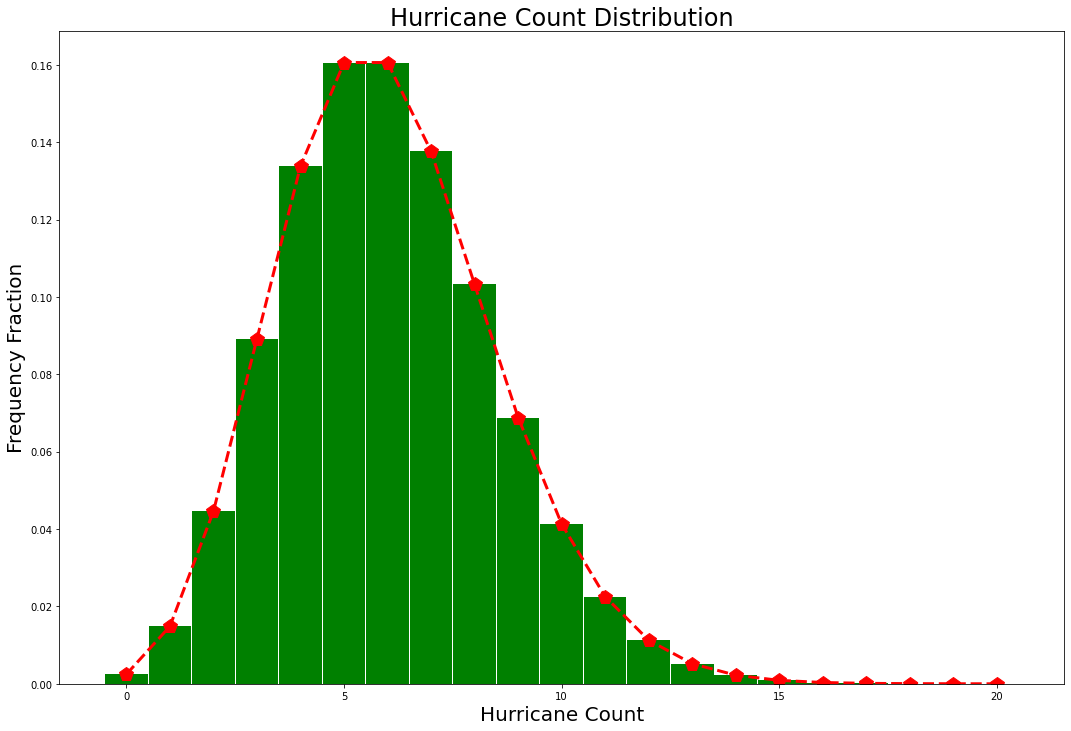

In [7]:
final_test = 20
mu_563 = 0
variance = 0
dist_dict = {}

for each in range(final_test + 1): dist_dict[each] = poisson_calc(mu_558, [each])
for each in dist_dict: mu_563 += each*dist_dict.get(each)
print("The calculated mean number of hurricanes per year is:", str(int(np.round(mu_563))) + ". This is the expected value as the Poisson distribution was generated around this average.")

for each in dist_dict: variance += dist_dict.get(each)*(each-mu_563)**2 # calculating the variance without a defined function as np.std assumes equally weighted values
print("\nThe variance is: ", int(np.round(variance)), ".\n", sep="") # ASSUMING POPULATION DEVIATION
#print("\n\n", dist_dict, "\n\n")
fig, ax = plt.subplots(figsize=(18,12))
ax.bar(dist_dict.keys(), dist_dict.values(), width=0.98, color='g')
ax.plot(dist_dict.keys(), dist_dict.values(), color='red', marker='p', linestyle='dashed', linewidth=3, markersize=15)
plt.title("Hurricane Count Distribution", fontsize=24)
ax.set_ylabel("Frequency Fraction", fontsize=20)
ax.set_xlabel("Hurricane Count", fontsize=20)
plt.show()